In [3]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.logic as lgc
import schemdraw.dsp as dsp

import matplotlib.pyplot as plt
import numpy as np
from wand.image import Image as WImage 
from wand.api import library
from ctypes import c_void_p, c_size_t
library.MagickSetCompressionQuality.argtypes = [c_void_p, c_size_t]

import os

In [4]:
class MeterP(elm.Element):
    def __init__(self, *args, **kwargs):
        super(MeterP, self).__init__(*args, **kwargs)
        self.segments.append(schemdraw.Segment([(0, 0), (2, 0)]))
        self.segments.append(schemdraw.Segment([(1, 1), (1, -1)]))
        self.segments.append(schemdraw.SegmentCircle((1, 0), .5))

        self.anchors['inp_amp'] = (0,0)
        self.anchors['out_amp'] = (2, 0)
        self.anchors['inp_vol'] = (1, 1)
        self.anchors['out_vol'] = (1, -1)

# Basiswissen

## SI-Einheiten

| Formelzeichen | Name        | Einheit |
|---------------|-------------|---------|
| s             | Länge       | m       |
| t             | Zeit        | s       |
| K             | Temperatur  | T       |
| I             | Stromstärke | A       |
| m             | Masse       | kg      |


## Einheiten gleichungen

## relative- und absoluter Fehler


## Maßnahmen zur Fehlervermeidung

## Übersicht über die Messfehler

### Systematische Fehler

### Dynamische Fehler

### Parallaxe fehler

## Fehlerfortpflanzung

## AD/DA

### Quantisierungsfehler

### Umsetzerkennlinien

### Signalformen

# Messverfahren

## Analoges und Digitales Oszilloskop

## Leisungsmessung im 1-Phasen-System

Leistung $= U\cdot I$

### Stromrichtige Messung

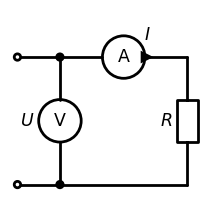

In [5]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)
    d += elm.Line().right().length(1).dot().idot(open=True)
    an = d.here

    d += (amp := elm.MeterA().right())
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += (vm := elm.MeterV().to(an).label('$U$'))
    d.pop()
    d += elm.Line().left().length(1).dot(open=True)

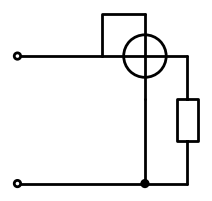

In [6]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)
    d.push()
    d += (mp := MeterP())

    d.pop()
    d += elm.Wire('|-').to((mp.anchors['inp_vol'][0] + 2, mp.anchors['inp_vol'][1]))

    d.here = (mp.anchors['out_amp'][0]+2, mp.anchors['out_amp'][1])
    d += elm.ResistorIEC().down()

    d += elm.Line().left().length(1).dot()
    d.push()
    d += elm.Line().to((mp.anchors['out_vol'][0]+2, mp.anchors['out_vol'][1]))
    d.pop()

    d += elm.Line().left().dot(open=True)

$P_r = U\cdot I$ ... richtige Leistung

$P_a = U'\cdot I$ ... angezeigte Leistung

$P_a = (U_{st} + U)\cdot I = P_{st} + P_r$

- $U'$ ... Eingangsspannung
- $U_{st}$...Spannung am Leistungsmessgerät
- $U$... Spannung am Widerstand

$P = U\cdot I + I^2\cdot R_A$

$R_A$...Innenwiederstand des Amperemeters

### Spannungsrichtig Messung

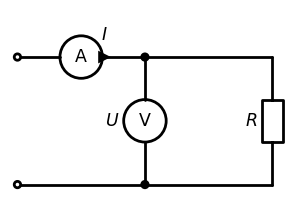

In [7]:
with schemdraw.Drawing() as d:
    #d += elm.Dot(open=True)

    d += (amp := elm.MeterA().right().dot().idot(open=True))
    d += elm.CurrentLabelInline(amp).label('$I$').flip().reverse()
    an = d.here
    d += elm.Line().right()

    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Line().left().dot()

    d.push()
    d += elm.MeterV().to(an).label('$U$')
    d.pop()
    d += elm.Line().left().dot(open=True)

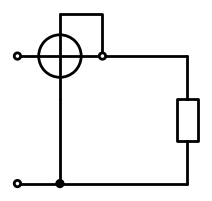

In [8]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += (mp := MeterP())

    d += elm.Wire('n').at(mp.anchors['out_amp']).to(mp.anchors['inp_vol'])

    d.here = mp.anchors['out_amp']
    d += elm.Dot(open=True)
    d += elm.Line().right().length(2)

    d += elm.ResistorIEC().down()
    d += elm.Line().left()

    d.push()
    d += elm.Line().to(mp.anchors['out_vol'])
    d.pop()
    d += elm.Line().left().length(1).idot().dot(open=True)

$I\cdot U$  ...richtige Leistung

$I'\cdot U$...angezeigte Leistung

$P_a = U\cdot(I_{sp} + I) = P_{sp} + P_r$


- $I'$ ... Eingangsstrom
- $I_{st}$...Strom durch Leistungsmessgerät
- $I$... Strom am Widerstand


$P = U\cdot I - \frac{U^2}{R_V}$

$R_V$...Innenwiederstand Voltmeter

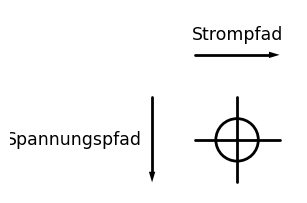

In [9]:
with schemdraw.Drawing() as d:
    d += (mp := MeterP())

    (vix, viy), (vox, voy) = mp.anchors['inp_vol'], mp.anchors['out_vol']
    (aix, aiy), (aox, aoy) = mp.anchors['inp_amp'], mp.anchors['out_amp']

    d += (elm.Line(arrow='->')
          .at((vix-2, viy))
          .to((vox-2, voy))
          .label('Spannungspfad'))

    d += (elm.Line(arrow='->')
          .at((aix, aiy + 2))
          .to((aox, aoy + 2))
          .label('Strompfad'))

### Leistungsarten

$P = U\cdot I\cdot (cos\varphi + i\cdot sin\varphi)$

### Wirkleistungsmessung

$P = U\cdot I \cdot cos \varphi$

Realteil der komplexen Leistung.

$P = \frac{1}{T}\cdot \int_0^T u(t)\cdot i(t) dt = U_{eff} \cdot I_{eff}\cdot cos\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

### Blindleistunsmessung

$Q = U\cdot I \cdot cos \varphi$

Imagiärteil der komplexen Leistung.

$Q = U_{eff} \cdot I_{eff}\cdot sin\varphi$

- $u(t) = \hat{u}\cdot sin(\omega\cdot t + \varphi_u$
- $i(t) = \hat{i}\cdot sin(\omega\cdot t + \varphi_i$
- $U_{eff} = \frac{\hat{u}}{\sqrt{2}}$
- $I_{eff} = \frac{\hat{i}}{\sqrt{2}}$

Wir über $90°$ ($\pi~rad$) Phasenverschiebung gemssen.
Bspw. in Spannungspfad.

### Scheinleistungsmessung

Die Komplexe Leistung, zusammengesetzt aus Wirk- und Blindleistung

$S = P + j\cdot Q = |S| \cdot cos\varphi + j\cdot |S| \cdot sin\varphi$


$S^2 = P^2 + Q^2$

## Sensorik

### Passive Sensoren

### Aktive Sensoren

### Temperatursensoren

### Spannungsabhängiger Widerstand

### Fotowiderstand

## Messbrücke

Allgemein:
$U_b = U_0 \cdot \left(\frac{R_2}{R_1 + R_2} - \frac{R_4}{R_4+R_3}\right)$

### Viertelbrücke

**Viertel**brücke $\Rightarrow$ 1 von 4 Widerständen änderbar

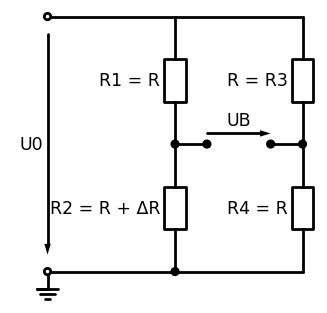

In [10]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line()
    d += elm.ResistorIEC().down().label('R = R3')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left()
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_3 = R_4 = R$  
$R_2 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{4R + \Delta R} \approx U_0 \cdot \frac{\Delta R}{4R}$

### Halbbrücke

**Halb**brücke $\Rightarrow$ 2 von 4 Widerständen änderbar

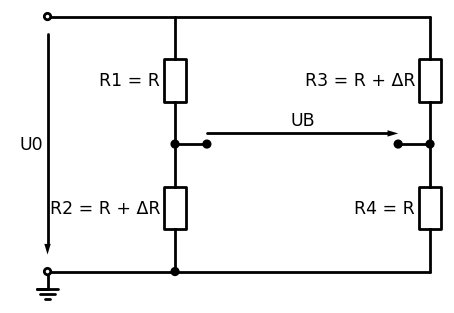

In [11]:
with schemdraw.Drawing() as d:
    d0 = d.add(elm.Dot(open=True))
    d += elm.Line()
    
    d.push()
    d += elm.ResistorIEC().down().label('R1 = R')
    d.push()
    
    d += elm.Dot()
    d += elm.Line().length(.75).right()
    d1 = d.add(elm.Dot())
    
    d.pop()
    d += elm.ResistorIEC().down().label('R2 = R + ΔR')
    
    d += (elm.Dot())
    d += elm.Line().left()
    de = d.add(elm.Dot(open=True))
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(6)
    d += elm.ResistorIEC().down().label('R3 = R + ΔR')
    d += elm.Dot()
    d.push()
    
    d += elm.ResistorIEC().down().label('R4 = R')
    d += elm.Line().left().length(6)
    
    d.pop()
    d += elm.Line().length(.75).left()
    d2 = d.add(elm.Dot())
    
    d += (elm.Arrow()
        .at((d1.start[0], d1.start[1] + 0.25))
        .to((d2.start[0], d2.start[1] + 0.25))
        .label('UB'))
    d += (elm.Arrow()
          .at((d0.start[0], d0.start[1]-.4))
          .to((de.start[0], de.start[1]+.4))
          .label('U0'))

$U_B = U_{R2} - U_{R4} = U_0 \cdot \left( \frac{R_2}{R_1 + R_2} - \frac{R_4}{R_3 + R_4} \right)$  
$R_1 = R_4 = R$  
$R_2 = R_3 = R + \Delta R$  
$\therefore U_B = U_0 \cdot \frac{\Delta R}{2R}$
Doppelte Spannungsempfindlichkeit im Vergleich zur Viertelbrücke

### Vollbrücke

Alle Widerstände sind veränderbar
    und in der Form $R \pm \Delta R$,
    wobei $R_1$ und $R_2$ sowie $R_3$ und $R_4$ gegengleich sind

$U_B = U_0 \cdot \frac{\Delta R}{R}$

Wieder Doppelte Empfindlichkeit im Vergleich zur Halbbrücke

## Digitale Frequenzmessung

### Schaltung

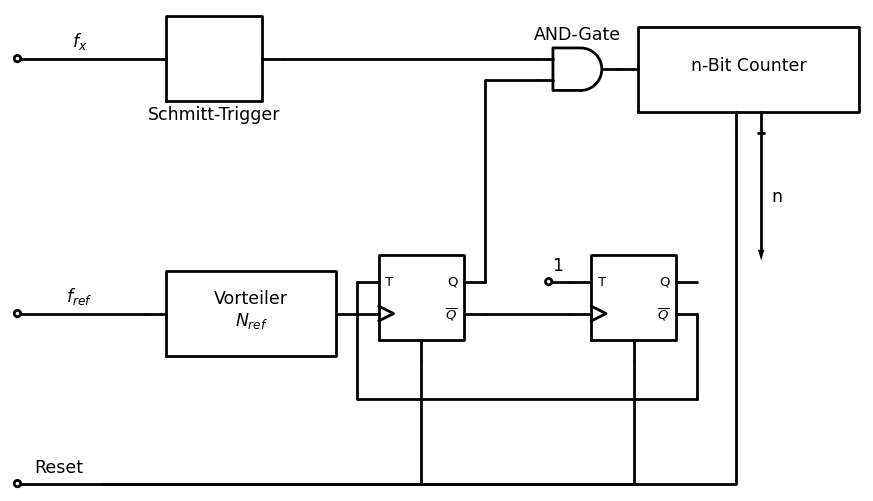

In [12]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side = 'left', anchorname='in1'),
        elm.IcPin(side = 'bottom', anchorname='out1'),
        elm.IcPin(side = 'bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])
    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop(); d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')

### Spannungsdiagramme

![](mtrs_media/Uf_diags.png)

### Berechnung der relevanten Größe

$N = f_x \cdot T_{ref}$

$f_x = \frac{T_{ref}}{N}$

## Digitale Periodendauermessung

### Schaltung

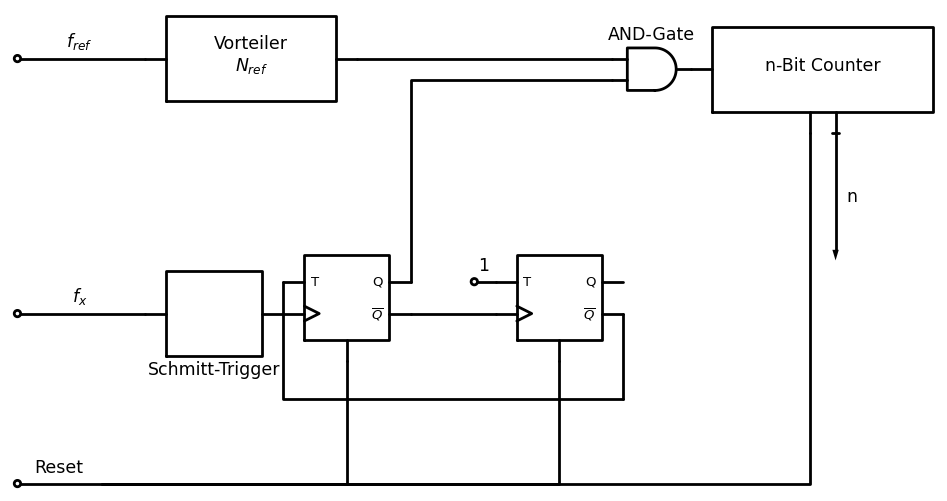

In [13]:

with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).label('$f_{ref}$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='right', anchorname='out')
    ], edgepadW=2).label('Vorteiler\n$N_{ref}$').anchor('in1').drop('out')

    d += elm.Line().length(6)
    d += (ACmp := lgc.And().anchor('in1').label('AND-Gate').drop('out'))

    d += (counter := elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='in1'),
        elm.IcPin(side='bottom', anchorname='out1'),
        elm.IcPin(side='bottom', anchorname='out2')
    ], edgepadW=2).anchor('in1').label('n-Bit Counter', 'center').drop('out1'))

    d.here = (0, -6)

    d += elm.Line().idot(open=True).label('$f_x$')
    d += elm.Ic(pins=[
        elm.IcPin(side='left', anchorname='inp'),
        elm.IcPin(side='right', anchorname='oup')
    ]).anchor('inp').drop('oup').label('Schmitt-Trigger', 'B')

    def t_ff():
        return elm.Ic(pins=[
            elm.IcPin('>', side='left'),
            elm.IcPin('T', side='left'),
            elm.IcPin('$\overline{Q}$', side='right', anchorname='nQ'),
            elm.IcPin('Q', side='right'),
            elm.IcPin(side='B', anchorname='res'),
        ])


    d += (ff1 := t_ff().anchor('>').drop('nQ'))
    d += elm.Line().right().length(2)
    d += (ff2 := t_ff().anchor('>').drop('nQ'))

    d += elm.Line().down().length(2)
    d += elm.Wire('-|').to(ff1.T)

    d += elm.Line().left().at(ff2.T).length(.5).dot(open=True).label('1')

    d += elm.Wire('|-').at(ff1.Q).to(ACmp.in2)

    d.here = (0, -10)
    d += elm.Line().idot(open=True).label('Reset').length(2)
    d.push()

    d += elm.Wire('-|').to(ff1.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(ff2.res)
    d.pop()
    d.push()
    d += elm.Wire('-|').to(counter.out1)

    d += elm.Line(arrow='|->').at(counter.out2).down().label('n', 'bottom')


### Spannungsdiagramme

![](mtrs_media/Uf_diags_inv.png)

### Berechnung der relevanten Größe

$N = T_x \cdot f_{ref}$


$T_x = \frac{f_{ref}}{N}$

## Digitale Phasenverschiebungsmessung

**Anforderungen**:
- $f_1 = f_2 = const$
- Gleichanteil = 0
    HP am Eingang
- gleiche Signalform

### Schaltung

![](mtrs_media/dphi_cir.png)

### Spannungsdiagramme

![](mtrs_media/dphi_diags.png)

### Berechnung der relevanten Größe

## U-f Umsetzer

### Schaltung

![](mtrs_media/uf_cur_real.png)

### Spannungsdiagramme

In [14]:
img = WImage(filename=os.path.join(os.getcwd(), 'mtrs_media', 'uf_diags_real.pdf[0]'))
library.MagickSetCompressionQuality(img.wand, 75)

True

### Berechnung der relevanten Größe

$f = \frac{1}{T} = \frac{1}{2t} = \frac{U_m}{4R_4 C \alpha U_{a, max}}$

### Anwendungsbeispiele

## DMS-Messbrücke

### Schaltungen


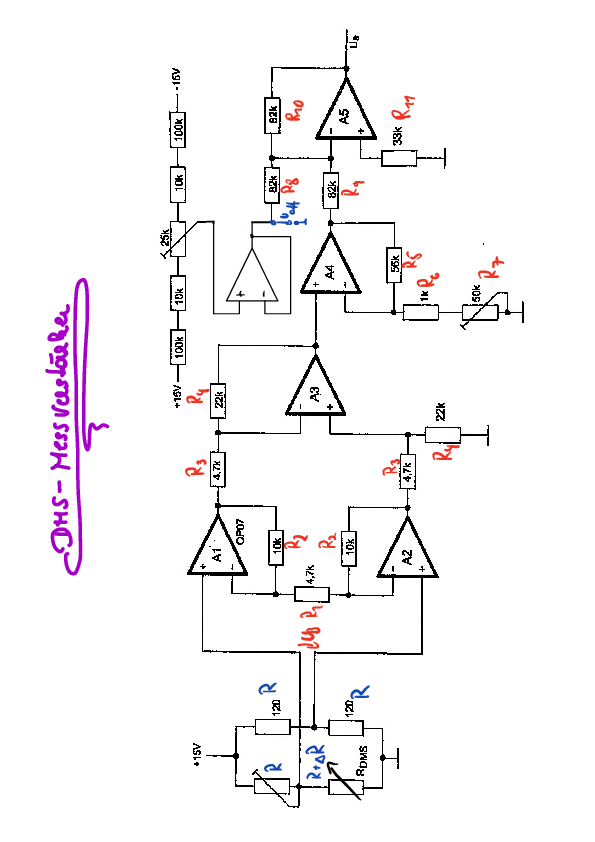

In [15]:
#WImage(filename=os.path.join(os.getcwd(), 'mtrs_media', 'dms_cir.pdf'))

WImage(filename="mtrs_media/dms_cir.pdf[0]")

### OPV-Verstärkerschaltung

![](mtrs_media/differential_amp.png)

### Berechnung/Herleitung der Ausgangsgröße

$U_{1} = U_B = U_{e2} - U_{e1} \wedge$

$I_{12} = \frac{U_1}{R_1} = \frac{U_{Diff}}{R_1 + 2R_2}\wedge$

$U_a = (U'_{e1} - U'_{e2}) \Rightarrow U_a = U_diff$

$\therefore U_a = \left(1 + \frac{2R_2}{R_1}\right)\cdot (U_{e2} - U_{e2})$...Differenz der Potentiale zwischen 2 Punkten

### Biasstromkompensation

OPVs sind nicht ideal ( Eingangsströme ) beeinflussen die Verstärkung deshalb Kompensation durch extra Schaltung.

# Signalaufbereitung

## Digitale Verarbeitungskette

### Anti Aliasing Filter

Um zu verhindern, dass das Abtasttheorem verletzt wird, werden Anti-Aliasing Filter verwendet.
Diese verhindern, 
    dass die Signalfrequenz höher ist als die Maximal erlaubte

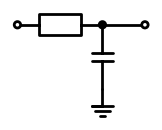

In [16]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().length(2).idot(open=True).dot()
    d.push()
    d += elm.Capacitor().down().length(1.5)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### S&H Glied

Für die AD-Umwandlung muss das Eingangssignal konstant Gehalten werden. 
Dafür werden **S**ample und **H**old Glieder verwendet

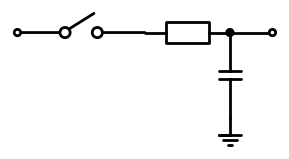

In [17]:
with schemdraw.Drawing() as d:
    d += elm.Switch().idot(open=True)
    d += elm.ResistorIEC().length(2).dot()
    d.push()
    d += elm.Capacitor().down().length(2)
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1).dot(open=True)

### Abtasttheorem

Die Abtastfrequenz muss mindestens doppelt so hoch sein wie die Signalfrequenz.

Wenn das Abtasttheorem verletzt wird, 
    so werden die hohen Frequenzanteile als niedrigere aufgefasst,
    welche das Signal verzerren

### Umsetzungskennlinien

## AD-Wandler

### Sukzessive Approximationsverfahren

#### Schaltung

In [18]:
SAR = elm.Ic(pins=[
        elm.IcPin(side='top', anchorname='SH'),
        elm.IcPin(name='Start', side='top'),
        elm.IcPin(name='Reset', side='top'),
        elm.IcPin(anchorname='in', side='left'),
        elm.IcPin(name='Finished', side='right'),
        elm.IcPin(anchorname='out', side='bottom')
    ],
    edgepadW= .5,
    pinspacing=1
).label('SAR', 'center')
#display(SAR)

In [19]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')
#display(DA_conv)

In [20]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
        elm.IcPin(side='top', anchorname='trigger')
    ]
).label('S and H', 'center')
#display(SH)

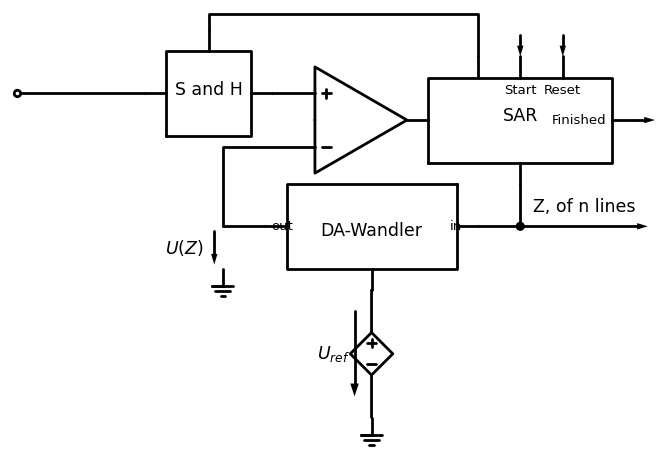

In [21]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().flip().anchor('in2'))
    d += SAR.anchor('in')
    d.here = SAR.out
    d += elm.Line().down().length(1)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in')
    d += elm.Line().at(DA_conv.out).left().length(1)
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z, of n lines')
    
    
    d += elm.Wire('n').at(SAR.SH).to(SH.trigger)
    
    d += elm.Line(arrow='->').at(SAR.Finished).right().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Start).up().length(.5)
    d += elm.Line(arrow='<-').at(SAR.Reset).up().length(.5)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down())
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()

#### Funktionsprinzip

1. Die Bits des SAR (**S**ukkzessive ***A**pprox **R**egister) sind alle auf 0
    Man hat einen Zeiger auf ein Bit, 
        welches am Anfang auf das **MSB** zeigt.
2. Das Bit des Zeigers wird auf 1 gesetzt,
3. Über einen DA-Wandler wird der Ausgang wieder zu einer analogen Spannung gewandelt.
4. Wenn die Spannung nun größer als die Eingangsspannung ist,
    wird das Bit wieder auf 0 gesetzt
   Ansonsten bleibt es auf 1.  
5. Wenn der Zeiger noch nicht das **LSB** erreicht hat,
       geht er um eine stelle zum nächsten weniger Werten Bit.
   Wenn der Zeiger das LSB erreicht hat, 
       so ist die Wandlung beendet und das *Finished*-Flag wird auf 1 gesetzt
       
Laufzeit: $O(log~n)$

#### Diagramme

Beispiel mit n=4 Bit und $U_e = 10.7V$, der Wert des LSB Beträgt $1V$ (MSB=> $8V$)

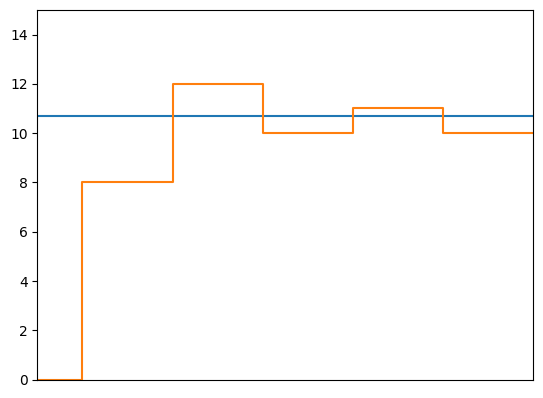

In [22]:
plt.figure(1)
plt.plot([-.1, 1], [10.7, 10.7])
plt.plot([-.1, 0,
         0, 0.2,
         0.2, .4,
         .4, .6,
         .6, .8,
         .8, 1],
        [0, 0,
        8, 8,
        12, 12,
        10, 10,
        11, 11,
        10, 10])

plt.xlim([-.1, 1])
plt.ylim([0, 15])
plt.xticks([])
plt.show()

#### Herleitungen

$U(z) = U_{ref}\cdot\frac{t}{t_{max} +1}\cdot U_e$  
$Z = \frac{Z_{max} + 1}{U_{ref}} \cdot U_e$

### Single Slope:

#### Schaltung

![](https://referate.mezdata.de/sj2006/09analogdigitalwandlung_danielerkert/res-wikipedia/single_slope_dac.png)

*Bei uns S&H Glied am Eingang*
*= kann bei uns ein \& sein*

#### Funktionsprinzip

- Es wird ein Sägezahn mit dem Eingang und mit Ground verglichen.
- Wenn der Sägezahn größer 0 ist und kleiner als das Eingangssignals 
    so ist das Und Gatter der Beiden Komparatoren HIGH.
  Durch ein UND Gatter mit einem Clock Signal, 
    wird dieses nur in diesen Zeitraum durchgelassen.
- Bei jeder durchgelassenen Clockflanke zählt ein Counter nach oben.

#### Diagramme

Text(0, 0.5, '$U_y$')

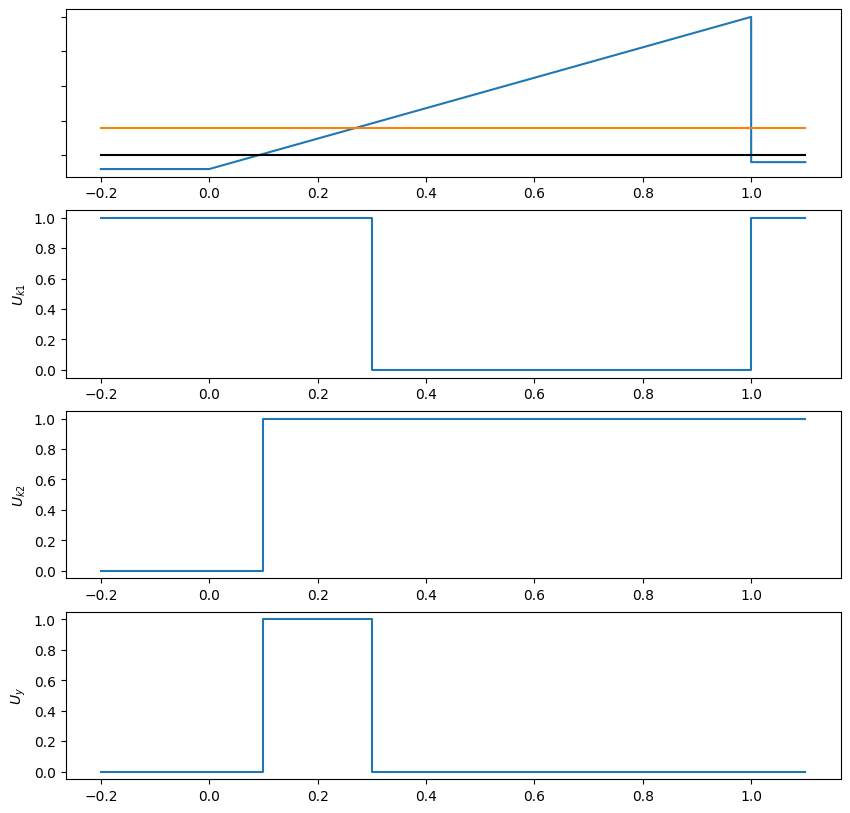

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

fig.set_size_inches(10, 10)

ax1.plot([-.2, 0, 1, 1, 1.1], [-1, -1, 10, -.5, -.5])
ax1.plot([-.2, 1.1], [2, 2])
ax1.plot([-.2, 1.1], [0, 0], color='black')
ax1.set_yticklabels([])

ax2.plot([-.2, .3, .3, 1, 1, 1.1], [1, 1, 0, 0, 1, 1])
ax2.set_ylabel('$U_{k1}$')

ax3.plot([-.2,.1 ,.1, 1.1], [0, 0, 1, 1])
ax3.set_ylabel('$U_{k2}$')

ax4.plot([-.2, .1, .1, .3, .3, 1.1], [0, 0, 1, 1, 0, 0])
ax4.set_ylabel('$U_y$')

#### Herleitungen

$N = \Delta t \cdot f_{clk}$

### Dual Slope:

#### Schaltung

![](http://www.vias.org/mikroelektronik/img/adcdslp.png)

#### Funktionsprinzip

- Es wird nach der Eingangsspannung invers für die Zeit $t_1$ Integriert
- Danach wird nach einer Referenzspannung nach oben integriert ($-$\&$-$ $\Rightarrow~~+$)
- Während des 2. Integrierens zählt ein Counter nach oben,
    dieser Vorgang wird abgebrochen, wenn der Integrierte Wert $~0$ erreicht (Komparator)

**WICHTIG:** $t_1$ ist konstant 

Da die Flächen gleich sind, fallen die $RC$ Komponenten weg, wodurch man nicht von Bauteildriften betroffen ist.

#### Diagramme

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780750687034000067-f06-81-9780750687034.gif)

#### Herleitungen

Die Fläche unter beiden Analogwerten ist gleich.

$-\frac{1}{RC} \int_0^{t_1} U_e dt = -\frac{1}{RC} \int_{t_1}^{t_2 + t_1} U_{ref}dt$  
$U_e\cdot t_1 = U_{ref}\cdot t_1 + U_{ref}\cdot t_2 - U_{ref}\cdot t_1$  
$U_e\cdot t_1 = U_{ref} \cdot t_2$  
$t_1 = 2^n\cdot T_{clk} \wedge t_2 \cdot Z\cdot T_{clk}$  
$U_e \cdot 2^n \cdot T_{clk} = U_{ref}\cdot Z \cdot T_{clk}$  
$Z = \frac{U_e}{U_{ref}} \cdot (Z_{max} + 1)$

### Zählverfahren

#### Schaltung

In [24]:
DA_conv = elm.Ic(
    pins=[
        elm.IcPin(side='left', name='in'),
        elm.IcPin(side='right', name='out'),
        elm.IcPin(side='top', anchorname='ref')
    ],
    edgepadW = 2
).label('DA-Wandler', 'center')

In [25]:
SH = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='right', anchorname='out'),
    ]
).label('S and H', 'center')

In [26]:
counter = elm.Ic(
    pins=[
        elm.IcPin(side='left', anchorname='in'),
        elm.IcPin(side='bottom', anchorname='out'),
        elm.IcPin(name='clk<', side='right', anchorname='clk'),
        elm.IcPin(name='reset', side='top')
    ], edgepadW=2.25
).label('n-bit counter', 'center')
#display(counter)

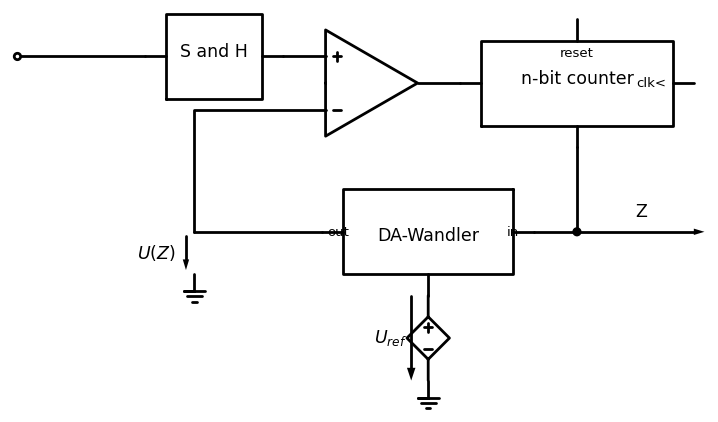

In [27]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += elm.Line()
    d += SH.anchor('in').drop('out')
    d += elm.Line().length(1)
    d += (cmp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().length(1)
    
    d += counter.anchor('in')
    d += elm.Line().at(counter.out).down().length(2)
    d.push()
    d += elm.Line().left().length(1)
    d += DA_conv.anchor('in').drop('out')
    d += elm.Line().left()
    
    d.push()
    d += (g1 := elm.Ground().at((d.here[0], d.here[1]-1)))
    d.pop()
    d.push()
    d += (elm.Line(arrow='->').at((d.here[0]-.2, d.here[1]-.1)).to((d.here[0]-.2, g1.start[1]+.1))
          .label('$U(Z)$'))
    d.pop()
    d += elm.Wire('|-').to(cmp.in1)
    
    d += (ref := elm.SourceControlledV().reverse()
          .at(DA_conv.ref).down().length(2))
    d += elm.CurrentLabel().reverse().at(ref).label('$U_{ref}$')
    d += elm.Ground()
    
    d.pop()
    d += elm.Dot()
    d += elm.Line(arrow='->').right().label('Z')

#### Funktionsprinzip

Solange der DA gewandelte wert von Z kleiner als U_e ist (Komparator gibt $0$ aus),
    zählt der Counter nach oben.
Wenn der Wert größer als U_e ist (Komparator gibt $0$ aus).
    so zählt der Counter nach unten.
    Laufzeit: $O(2^n)$
    
Wenn sich der Eingang um weniger als $U_{LSB}\cdot f_{clk} \equiv \frac{[V]}{[s]}$ ändert,
    so kann das S\&H Glied weggelassen werden.
Dadurch folgt der Ausgangswert dem Eingangswert.

#### Diagramme

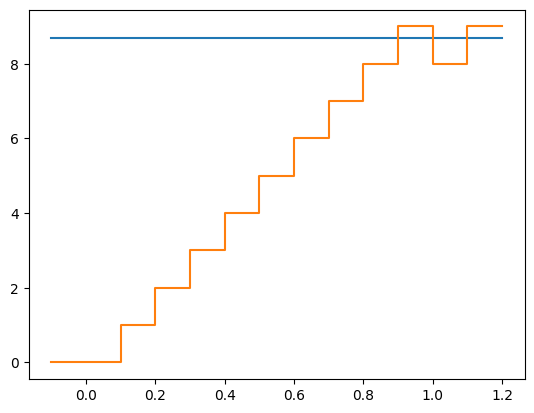

In [28]:
fig, ax = plt.subplots(1,1)
ax.plot([-.1, 1.2], [8.7, 8.7])

ax.plot([
    -.1, .1,
    .1, .2,
    .2, .3,
    .3, .4,
    .4, .5,
    .5, .6,
    .6, .7,
    .7, .8,
    .8, .9,
    .9, 1,
    1, 1.1,
    1.1, 1.2 
],[
    0, 0,
    1, 1,
    2, 2,
    3, 3,
    4, 4, 
    5, 5,
    6, 6,
    7, 7,
    8, 8,
    9, 9,
    8, 8,
    9, 9
])

## DA-Wandler

### R2R-Netzwerk

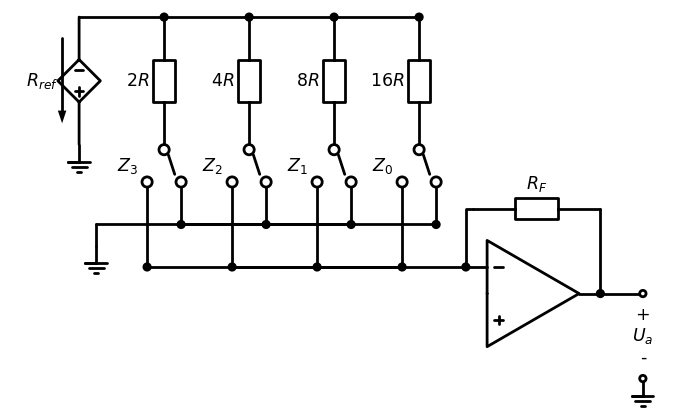

In [29]:
with schemdraw.Drawing() as d:
    d.push()
    d += (ref := elm.SourceControlledV().down())
    d += elm.CurrentLabel().reverse().at(ref).label('$R_{ref}$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N-1, -1, -1):
        d += elm.Line().dot().length(2)
        d.push()
        nr = 2**(N-i)
        d += elm.ResistorIEC().down().label(f'${nr}R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += elm.Line().down().length(.5)
    d += elm.Ground()
    
    zs.reverse()
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    
    d += elm.Line().length(1.5).dot()
    loop = d.here
    d += elm.Line().length(.5)
    d += (amp := elm.Opamp().anchor('in1'))
    d += elm.Line().length(.5).dot()
    
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_F$')
    d += elm.Wire('-|').to(loop)
    d.pop()
    
    d += elm.Line().length(1)
    d += elm.Dot(open=True)
    d += elm.Gap().down().label(('+', '$U_a$','-')).length(2)
    d += elm.Dot(open=True)
    d += elm.Ground()

### Prinzip der gewichteten Ströme

Nach Überlagerungs-Prinzip Summe von jeden einzelnen Pfad.

$U_a = -U_{ref}\cdot \left(Z_3\cdot\frac{R_F}{2R} + Z_2\cdot\frac{R_F}{4R} + Z_1\cdot\frac{R_F}{8R} + Z_0\cdot\frac{R_F}{16R}\right)$  
$U_a = -U_{ref} \cdot \frac{R_F}{16R}\cdot (8\cdot Z_3 + 4\cdot Z_2 + 2 \cdot Z_1 + Z_0)$  
In dieser Form gut einsehbar, jeder Schalter representiert ein Bit.  
$\forall Z_i \in \{0, 1\}$  
$U_a = -U_{ref} \cdot\frac{R_F}{16R}\cdot Z = -U_{ref}\cdot\frac{R_F}{R}\cdot \frac{Z}{Z_{max}  +1}$

Strom ist unabhängig von Z.  
$I'  = U_{ref} \cdot \frac{Z}{Z_{max} + 1}\cdot \frac{1}{R}$  
$I'' = \frac{U_{ref}}{R}\cdot \frac{Z_{max} - Z}{Z_{max} + 1}$

$I = I' + I''$  
nicht von $Z$ abhängig

### Inverses R2R-Netzwerk

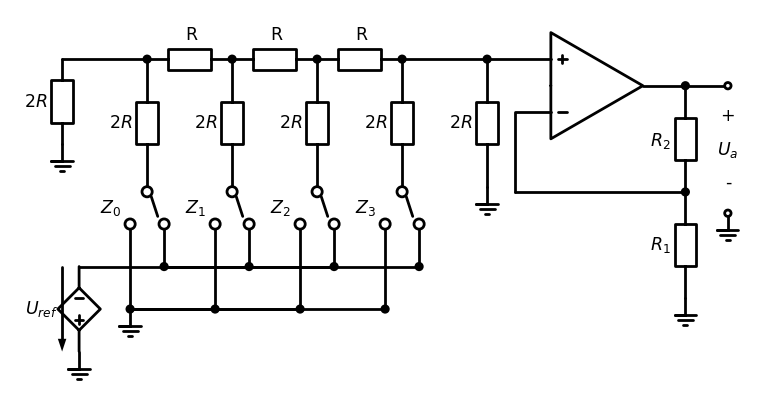

In [30]:
with schemdraw.Drawing() as d:
    d.push()
    d += elm.ResistorIEC().down().length(2).label('$2R$')
    d += elm.Ground()
    d.pop()
    
    zs = []
    N = 4
    for i in range(N):
        if not (i == 0):
            d += elm.ResistorIEC().dot().length(2).label('R')
        else:
            d += elm.Line().dot().length(2)
        d.push()
        d += elm.ResistorIEC().down().label(f'$2R$')
        d += (z := elm.SwitchSpdt2().down().label(f'$Z_{i}$'))
        zs.append(z)
        d.pop()
    d.push()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.b).down().dot().length(1)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Line().left().length(2)
    d += (ref := elm.SourceControlledV().down().length(2))
    d += elm.CurrentLabel().at(ref).reverse().label('$U_{ref}$')
    d += elm.Ground()
    
    prev = None
    for z in zs:
        d += elm.Line().at(z.c).down().dot().length(2)
        if not prev:
            d.push()
            prev = d.here
            continue
        d += elm.Line().to(prev)
        prev = d.here
    d.pop()
    d += elm.Ground()
    
    d.pop()
    d += elm.Line().length(2).dot()
    d.push()
    d += elm.ResistorIEC().down().label('$2R$')
    d += elm.Ground()
    d.pop()
    
    d += elm.Line().length(1.5)
    d += (amp := elm.Opamp().anchor('in2').flip())
    d += elm.Line().at(amp.out).length(1).dot()
    
    d.push()
    d += elm.ResistorIEC().down().length(2.5).dot().label('$R_2$')
    d.push()
    d += elm.Line().left().length(4)
    d += elm.Wire('|-').to(amp.in1)
    d.pop()
    
    d += elm.ResistorIEC().down().length(2.5).label('$R_1$')
    d += elm.Ground()
    d.pop()
    d += elm.Line().length(1)
    d += elm.Gap().down().label(('+', '$U_a$', '-')).dot(open=True).idot(open=True)
    d += elm.Ground()

Bei Überlagerung alle Werte bis zum Schalter kollabieren zu 2R

Durch Teilung danach,
    $\varphi_+ = Z_3 \cdot \frac{U_{ref}}{3} + Z_2 \cdot \frac{U_{ref}}{6} + Z_1 \cdot \frac{U_{ref}}{12} + Z_0 \cdot \frac{U_{ref}}{24}$  
$\varphi_+ = \frac{U_{ref}}{24} \cdot (8 \cdot Z_3 + 4 \cdot Z_2 +  2 \cdot Z_1 + Z_0)$   
$\varphi_+ = \frac{U_{ref}}{24}\cdot Z = \frac{16}{16}\cdot \frac{U_{ref}}{24}\cdot Z$  

$U_a = \frac{U_{ref}}{3}\cdot \frac{Z}{Z_{max}} \cdot \left(1 + \frac{R_2}{R_1} \right)$

# Industrielle Anwenung

## Bustopologie und Zugriffsverfahren

### Bustopologievarianten

### Master-Slave-Prinzip

### CSMA/CD

### CSMA/CA

### Wired-AND

## Serielle Schnittstelle

### RS232

### Störeinflüsse

### Differenzielle Datenübertragung

### Twistet-Pair

## MAX-232-Ladungspumpenprinzip

## Datensicherungsverfahren

### Paritätsbit

### Hamming-Distanz

## CRC (Cycle Redundancy Check)

### Grundprinzip

### Generatorpolynom

### Rechnenprinzip

### Fehlererkennung

## I2C

### Spezifikation

### Adressierung

### Wired-AND

### Datanübertragunsrahmen

### Ablauf Datensenden und Datenempfang

### Busarbitrierung

## Can

### Spezifikation

### Adressierung

### Wired-AND

### Datanübertragunsrahmen

### Ablauf Datensenden und Datenempfang

### Busarbitrierung

### Physikalische und Strukturelle Fehlererkennungsmasnahmen

### Bit-Stuffing

## OSI-ISO-Modell für Schnittstellen

# Regelungstechnik

In [31]:
def create_block(text:str='',*, wpadding=1.5):
    return elm.Ic(
        pins=[
            elm.IcPin(side='L', anchorname='in1'),
            elm.IcPin(side='R', anchorname='out')
        ], edgepadW=wpadding
    ).label(text, 'center').anchor('in1').drop('out')

#display(create_block('$IT1$-Element'))

## Regelkreis

### Standardregelkreis

### Blockschaltbild

### Bestimmung Sprungantwort

### Ü-Funktion zwischen Ausgängen und Eingängen von Regelkreisen

### Beschreibung im Zeit- und Frequenzbereich

### Rückwirkungsfreiheit 

## Übertragungsfunktion

Die Übertragungsfunktion stellt das Verhältnis von Ausgang zu Eingang dar $\frac{U_a}{U_e}$  

Es gibt sowohl die Übertragungsfunktion für den Zeit und den Bildbereich, 
    wobei im meist die im Bildbereich relevant ist um die Amplitude und Phase im Verhältnis zur Eingangsfrequenz darzustellen.
    $\frac{U_a(s)}{U_e{s}} = G(s)$  
    Die Übertragungsfunktion im Bildbereich kann auch für die Sprungantwort verwendet werden $\left(U_e = \frac{1}{s}\right)$

## Laplace-Transformation

### Vorgehensweise bei Systemantwort (Sprungantwort)

$G(s) = \frac{U_a}{U_e} \Rightarrow U_a(s) = G(s) \cdot U_e \wedge U_e = \frac{1}{s} \Rightarrow U_a(s) = \frac{G(s)}{s} $  

$\mathscr{L}^{-1}\left\{U_a(s)\right\} = \mathscr{L}^{-1}\left\{\frac{G(s)}{s}\right\}$ = ...

### Anwendung von AWT, EWT

$\lim_{s\rightarrow 0+}   ~s \cdot F(s) = \lim_{t\rightarrow\infty}f(t)$  

$\lim_{s\rightarrow\infty}~s \cdot F(s) = \lim_{s\rightarrow 0+}   f(t)$

### Partialbruchzerlegung für $\mathscr{L}^{-1}$

Geogebra Befehl:
> PartialFractions($Function$)

macht die Zerlegung automatisch,
    dies wird verwendet um Komplexe Brüche mit Polynomen auf einfachere Brüche aufzuteilen.  
Welche dann - im Ideallfall -  in der Transformationstabelle vorhanden sind.

### Inverse Laplace-Transformation mittels Transformationstabelle

- Man nimmt die jeweilige Form der Funktion im Zeit/Bildbereich
- Man bringt die Funktion in eine Form, welche in der Tabelle gegeben ist
    !! Form muss vorhanden sein
    Parzialbruch bei Polynombrüchen
- Man suche die Werte für die variablen Konstanten in der Funktionen (e.g. $a$)  
- Man nehme die Funktion auf der anderen Seite und setze die Werte wieder ein
>- Enjoy

![](mtrs_media/laplace_table.png)

## RT-Modelle der OPV-Grundschaltung

### Inv. und nicht inv OPV-Verstärker

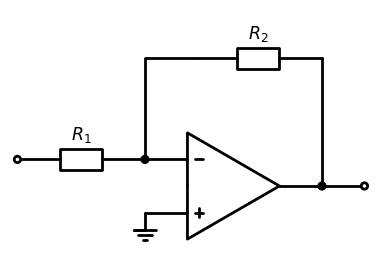

In [32]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('${R_1}$')
    tmp = d.here

    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1'))

    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().dot(open=True).length(1)

    d.pop()
    d += elm.Line().up()
    d += elm.ResistorIEC().left().label('${R_2}$')
    d += elm.Wire('-|').to(tmp) 

    d += elm.Line().length(1).left().at(amp.in2)
    d += elm.Ground()

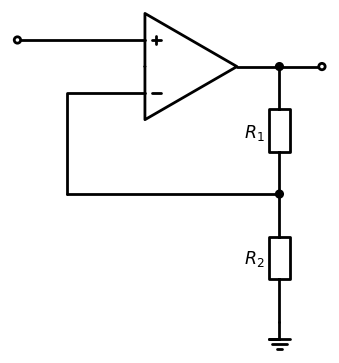

In [33]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True)
    d += (amp := elm.Opamp().anchor('in2').drop('out').flip())
    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().length(1).dot(open=True)
    d.pop()
    d += elm.ResistorIEC().down().dot().label('$R_1$')
    d.push()
    d += elm.Line().left().length(5)
    d += elm.Wire('|-').to(amp.in1)
    d.pop()
    d += elm.ResistorIEC().down().label('$R_2$')
    d += elm.Ground()

$U_a = U_e\cdot \left(1 + \frac{R_2}{R_1}\right)$

### Bestimmung der OPV-Verstärkung

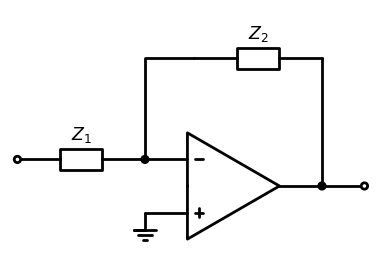

In [34]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('${Z_1}$')
    tmp = d.here

    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1'))

    d += elm.Line().length(1).dot()
    d.push()

    d += elm.Line().dot(open=True).length(1)

    d.pop()
    d += elm.Line().up()
    d += elm.ResistorIEC().left().label('${Z_2}$')
    d += elm.Wire('-|').to(tmp) 

    d += elm.Line().length(1).left().at(amp.in2)
    d += elm.Ground()

$U_a = U_e\cdot -\frac{Z_2}{Z_1}$  

### Auswirkung auf die Regelabweichung

## Zusammengesetzte Frequenzgänge 

### Knickzug vom Amplituden- und Phasengang

Bei der Knickkreisfrequenz $\omega_g$ ist bei den Meisten elementen ein Umschwung der Versärkerfunktion, bspw. von $0dB/dek$ auf $-20dB/dek$ bei einem PT1-Element

### Zerlegung von Übertragungsfunktionen in Grundglieder

Um Übertragungsfunktion muss in einzelne Elemente zu zerlegen muss es zu einer Reihe an Multiplikationen von $T_1\cdot s$, $\frac{1}{T_1\cdot s}$, $\frac{k}{1+T_1\cdot s}$, $k\cdot(1 + T_1\cdot s)$ zerlegt werden.

### Rekonstruktion von $G(s)$ aus Amplitudenverlauf

Zum Rekonstruieren müssen bei einer änderung jeweilige Elemente (je nach veränderung; meist PT1 oder PD) dazugeschaltet werden, 
    bei den zusätzlichen Elementen muss die Verstärkung dimensioniert werden (bei allen außer dem ersten meist $1$), 
    und die Kreisfrequenz des Knicks dimensioniert werden.
Am Anfang muss das jeweilige Element ausgewählt werden welches die Funktion vor jedem Knick gut beschreibt

Um auf die gesamt OPV-Schaltung zu kommen müssen die OPV-Schaltungen der einzelnen Elemente aneinander gehängt werden (Vorzeichen beachten)

## Grundglieder

### I

#### Übertragungsfunktion

$G(s) = \frac{1}{s}$

#### Sprungantwort

$U_a(s) = \frac{1}{s} \cdot U_e = \frac{1}{s}\cdot \frac{1}{s} = \frac{1}{s^2}$

$u_a(t) = t$

#### Bode-Diagramm

$G(i\omega) = \frac{1}{T_1\cdot i\omega}$

#### Amplitudengang

$|G(s)| = \frac{1}{\omega}$

$log|G(s)| = - 20\cdot log(s)$

#### Phasengang

$arg(G(s)) = 0 - \frac{\pi}{2} = 0- 90°$

''

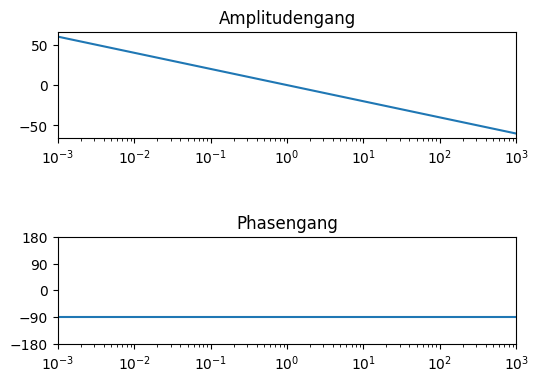

In [35]:
fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, -20*np.log10(t))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_title('Amplitudengang')

phase.plot(t, np.fromiter((-90 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])
;

#### OPV-Schaltung

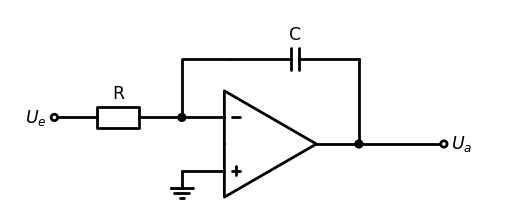

In [36]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('R').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.Capacitor().left().label('C')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()

### P

#### Übertragungsfunktion

$G(s) = k$

#### Sprungantwort

$U_a(s) = k\cdot\frac{1}{s}$

$u_a(t) = k\cdot \sigma(t)$

#### Bodediagramm

$G(i\omega) = k$

#### Amplitudengang

$|G(s)| = k$

$log|G(s)| = - 20\cdot log(k)$

#### Phasengang

$arg(G(s)) = 0$

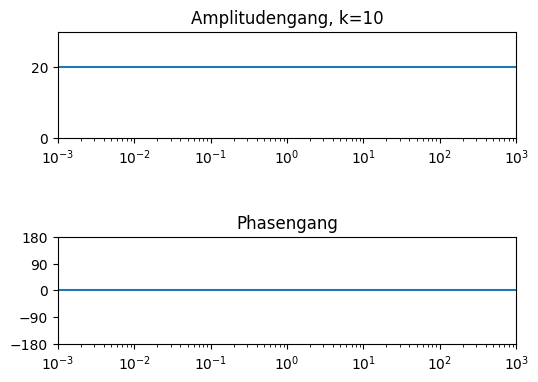

In [37]:

fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, np.fromiter((20*np.log10(10) for _ in t), dtype=t.dtype))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_ylim(-0.1, 30)
amp.set_title('Amplitudengang, k=10')

phase.plot(t, np.fromiter((0 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])


#### OPV-Schaltung

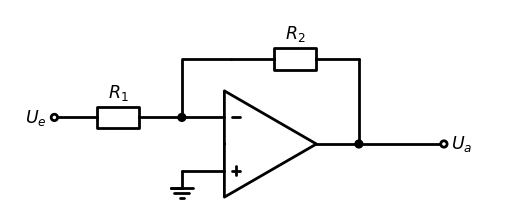

In [38]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R_1$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_2$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


### D

#### Übertragungsfunktion

$G(s) = T_1\cdot s$

#### Sprungantwort

$U_a(s) = T_1\cdot s\cdot\frac{1}{s}$

$u_a(t) = k\cdot \delta(t)$

#### Bodediagramm

$G(i\omega) = T_1 \cdot i\omega$

#### Amplitudengang

$|G(s)| = T_1\cdot\omega$

$log|G(s)| = - 20\cdot log(T_1\cdot\omega)$

#### Phasengang

$arg(G(s)) = 90°$

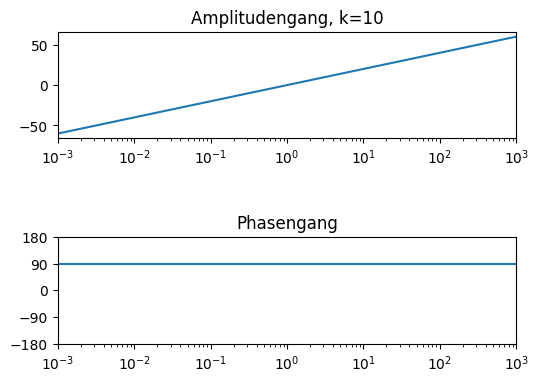

In [39]:

fig, (amp, phase) = plt.subplots(2, 1)
fig.tight_layout(pad=5.0)

t = np.logspace(-3, +3, num=20, base=10)

amp.plot(t, 20*np.log10(t))
amp.set_xscale('log')
amp.set_xlim(1e-3, 1e+3)
amp.set_title('Amplitudengang, k=10')

phase.plot(t, np.fromiter((90 for _ in t), t.dtype))
phase.set_xscale('log')
phase.set_xlim(1e-3, 1e+3)
phase.set_title('Phasengang')
phase.set_ylim(-180, 180)
phase.set_yticks([180, 90, 0, -90, -180])


#### OPV-Schaltung

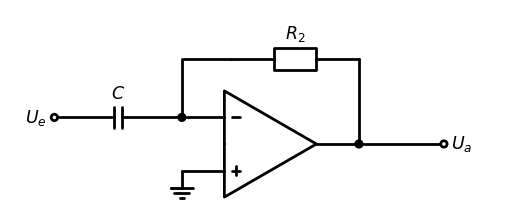

In [40]:
with schemdraw.Drawing() as d:
    d += elm.Capacitor().dot().idot(open=True).label('$C$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_2$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


### PT1, PI, PD, DT1 Zusammen

|                    | PT1                                                 | PD                                     | PI                                                           | DT1                                                         |
|--------------------|-----------------------------------------------------|----------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|
| $G(s)$             | $k\cdot\frac{1}{1 + T_1\cdot s}$                    | $k\cdot(1 + T_1\cdot s)$              | $k\cdot\frac{T_1\cdot s + 1}{T_1 \cdot s}$                   | $k\cdot\frac{T_1\cdot s}{1+T_1\cdot s}$                     |
| $\|G(i\omega)\|$   | $\|k\|\cdot\frac{1}{\sqrt{1 + T_1^2\cdot\omega^2}}$ | $k\cdot\sqrt{1 + T_1^2\cdot \omega^2}$ | $\|k\|\cdot\frac{\sqrt{1 + T_1^2\omega^2}}{T_1\cdot \omega}$ | $\|k\|\cdot\frac{T_1\cdot\omega}{\sqrt{1 + T_1^2\omega^2}}$ |
| $arg(G(i\omega)\|$ | $0 - arctan(T_1\omega)$                             | $arctan(T_1\cdot\omega)$               | $arctan(T_1\cdot\omega)-90°$                                 | $90°-arctan(T_1\cdot\omega)$                                |

### Amplitudengang für Name

Beim Verbinden von zwei Punkten durch den Mittelpunkt,
    ergibt sich der Amplitudengang für das Regelelement für die dazugehörigen Buchstaben,
    von dieser Form kann $G(s)$ hergeleitet werden und von dieser der Rest

(-3.5, 3.5)

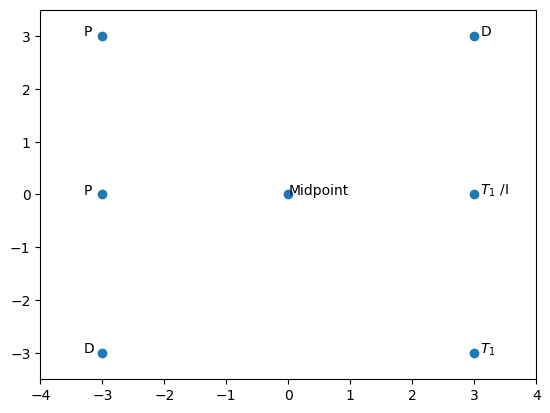

In [41]:
fig, ax = plt.subplots()

ax.text(-3.3,  3, 'P')
ax.text(-3.3,  0, 'P')
ax.text(-3.3, -3, 'D')


ax.text(3.1,  3, 'D')
ax.text(3.1,  0, '$T_1~$/I')
ax.text(3.1, -3, '$T_1$')

ax.text(0, 0, 'Midpoint')

ax.scatter([-3,-3,-3, 0, 3, 3, 3], [3, 0, -3, 0, 3, 0, -3])

ax.set_xlim(-4, 4)
ax.set_ylim(-3.5, 3.5)

### Sprungantwort

Man nimmt $G(s)$, $G(s) = \frac{U_a(s)}{U_e(s)}$, wenn dies nun auf $U_a(s)$ Umgeformt wird so ergibt sich $U_a(s) = G(s)\cdot U_e(s)$.

Um die Sprungantwort zu berechnen wir in das Regelglied $U_e(s) = \frac{1}{s}$ geschickt.
Dadurch ergibt sich: $U_a(s) = G(s)\cdot\frac{1}{s}$.
Hier muss man nun für $G(s)$, für das entsprechende Regelelement einsetzen und anschließend Rücktransformieren.

### OPV-Schaltung

Die Form des Amplitudenganges über den unteren Graphen legen und die nächste Vertikale Linie nehmen, 
Wenn diese näher an Seriell ist so sind Capazität und Widerstand in Serie geschaltet, 
    bei Parallel, Parallel.
Wenn der Linie zu Output geht so ist die Verschaltung von Widerstand und Kapazität am Ausgangspfad
    und wenn nächer bei Input beim Eingang.

<a id='OPV-Circuit-Generator'>

(-2.2, 2.2, -3.3, 3.3)

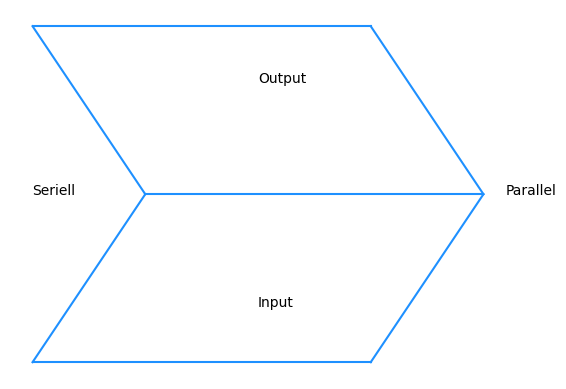

In [42]:
fig, ax = plt.subplots()

ax.plot([-1, -2], [0, 3], color="dodgerblue")
ax.plot([-1, -2], [0, -3], color="dodgerblue")

ax.plot([-2, 1], [3, 3], color="dodgerblue")
ax.plot([-2, 1], [-3, -3], color="dodgerblue")
ax.plot([-1, 2], [0, 0], color="dodgerblue")

ax.plot([1, 2], [3, 0], color="dodgerblue")
ax.plot([1, 2], [-3, 0], color="dodgerblue")

ax.text(0, 2, 'Output')
ax.text(0, -2, 'Input')
ax.text(-2, 0, 'Seriell')
ax.text(2.2, 0, 'Parallel')


ax.set_yticks([])
ax.set_xticks([])
ax.axis('off')

### IT1

Zusammengesetzt aus einem I- und einem PT1-Regler.

Amplitudengänge addieren sich im logarithmischen Bereich.
Und Phasengänge Addieren sich.

$G(s) = \frac{k}{T_I\cdot s\cdot(1 + T_1\cdot s)}$
...

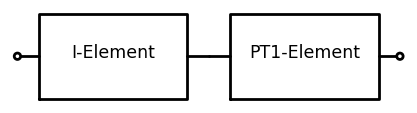

In [43]:
with schemdraw.Drawing() as d:
    d += elm.Dot(open=True)
    d += create_block('I-Element')
    d += create_block('PT1-Element')
    d += elm.Dot(open=True)

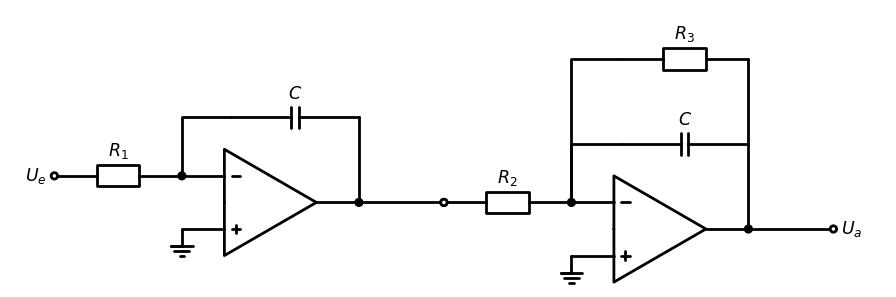

In [44]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R_1$').label('$U_e$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp1 := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += (r2 := elm.Capacitor().left().label('$C$'))
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True)
    d.push()

    d += elm.Line().left().length(1).at(amp1.in2)
    d += elm.Ground()

    d.pop()

    d += elm.ResistorIEC().dot().idot(open=True).label('$R_2$') 
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp2 := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)

    d.push()
    d += elm.Capacitor().left().label('$C$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R_3$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')
    d.push()

    d += elm.Line().left().length(1).at(amp2.in2)
    d += elm.Ground()



### PDT1

Das PDT1-Element setzt sich aus 1xPT1 und 1xPD -Element zusammen

$G(s) = \frac{\left(1+sT_1\right)}{\left(1+sT_1\right)}$

$|G(j\omega)| = \frac{\sqrt{1+\omega^2T_1^2}}{\sqrt{1 + \omega^2T_2^2}}$

$arg(j\omega) = atan(\omega T_1) - atan(\omega T_2)$

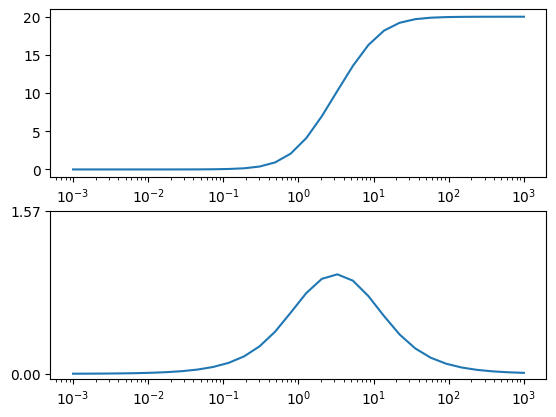

In [55]:
T_1 = 1/1
T_2 = 1/10

aG = lambda w: np.sqrt(1 + w**2 * T_1**2)/ np.sqrt(1 + w**2 * T_2**2)
pG = lambda w: np.arctan(w*T_1) - np.arctan(w*T_2)

w = np.logspace(-3, 3, 30)  

fig, (amp, ph) = plt.subplots(2, 1)  

amp.plot(w, 20*np.log10(aG(w)))
amp.set_xscale('log')

ph.plot(w, pG(w))
ph.set_xscale('log')
ph.set_yticks([np.pi/2, 0])

OPV-Schaltung ist ein inv Verstärker mit $R||C$ für $Z_1$ **und** $Z_2$

#### Sprungantwort

$U_a(s) = \frac{1 + sT_1}{1 + sT_2} \cdot \frac{1}{s}$  

$= \frac{1 + sT_1}{s + s^2T_2} $  
mit Tabelle: $u_a(t) = 1- \left(1-\frac{T_1}{T_2}\right)\cdot e^{-\frac{t}{T_2}}$

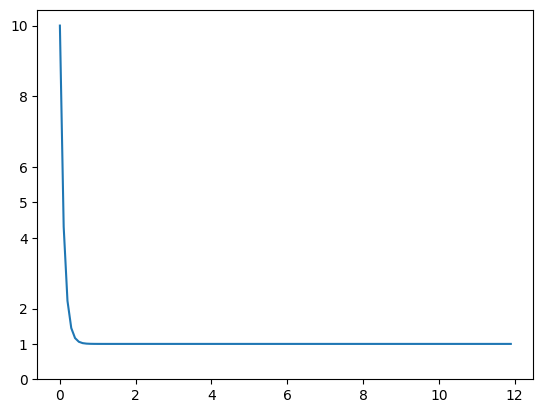

In [64]:
T_1 = 1/1
T_2 = 1/10

fig, ax = plt.subplots()

t = np.arange(0, 12, 0.1)

ua = lambda t: 1 - (1-T_1/T_2) * np.e**(-t/T_2)

ax.plot(t, ua(t))
ax.set_yticks([0,1,2,4,5,6,8, 10])

Startwert ist $k\cdot\frac{T_1}{T_2}$  
Endwert ist $k$

### OPV-Schaltung aus Blockdiagramm

Zum Rekonstruieren müssen bei einer änderung jeweilige Elemente (je nach veränderung; meist PT1 oder PD) dazugeschaltet werden, 
    bei den zusätzlichen Elementen muss die Verstärkung dimensioniert werden (bei allen außer dem ersten meist $1$), 
    und die Kreisfrequenz des Knicks dimensioniert werden.
Am Anfang muss das jeweilige Element ausgewählt werden welches die Funktion vor jedem Knick gut beschreibt

Um auf die gesamt OPV-Schaltung zu kommen müssen die OPV-Schaltungen der einzelnen Elemente aneinander gehängt werden (Vorzeichen beachten),
Die OPV Schaltungen sind alle modifikationen des Invertierenden Verstärkers, 
    bei dem ein Widerstand mit einer Kapazität und Widerstand ausgestauscht, 
    je nach Element können diese in Serie oder Parallel liegen.
Für die Verschaltung siehe [OPV-Schaltungen](#OPV-Circuit-Generator)

### OPV-Schaltung für Summen- und Differenzknoten

Summierknoten werden über OPV-Summierer/Subtrahierer realisiert
In den Schaltungen gilt:
- Ausgang: $U_a$
- Eingänge je nach Vorzeichen
Evtl. Vorzeichen durch Invertierer anpassen

#### OPV Subtrahierer

$U_a = U_{e1} - U_{e2}$

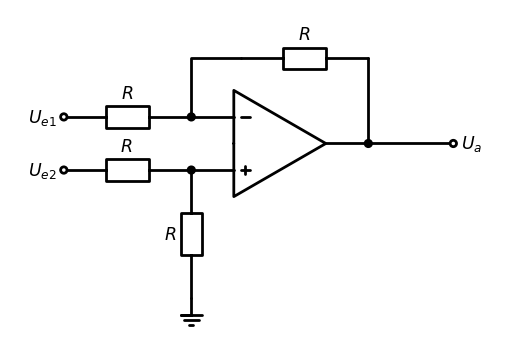

In [ ]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R$').label('$U_{e1}$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R$')
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2).dot()
    d.push()
    d += elm.ResistorIEC().down().label('$R$')
    d += elm.Ground()

    d.pop()
    d += elm.ResistorIEC().left().label('$R$').dot(open=True).label('$U_{e2}$', 'L')

#### inv OPV Summierer

$U_a = -(U_{e1} + U_{e2})$

für N-Eingänge gilt:
$U_a = - \Sigma_{i=0}^{N}~U_{ei}$

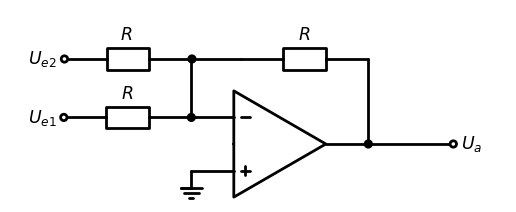

In [ ]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().dot().idot(open=True).label('$R$').label('$U_{e1}$', 'L')
    tmp = d.here
    d += elm.Line().length(1)
    d += (amp := elm.Opamp().anchor('in1').drop('out'))

    d += elm.Line().right().length(1).dot()
    d.push()
    d += elm.Line().up().length(2)
    d += elm.ResistorIEC().left().label('$R$')
    d += elm.Line().left().length(1.15).dot()
    d.push()
    d += elm.ResistorIEC().left().dot(open=True).label('$U_{e2}$', 'L').label('$R$')
    d.pop()
    d += elm.Wire('-|').to(tmp)
    d.pop()
    d += elm.Line().length(2).dot(open=True).label('$U_a$', 'R')

    d += elm.Line().left().length(1).at(amp.in2)
    d += elm.Ground()


## PT $_2$ Element

Zusammen aus 1x IT1-Element in mit Rückkopplung (Schwingungsfähig)  

Zwei PT1-Element (nicht Schwingungsfähig)

### Beschreibung im Frequenz- und Zeitbereich

$G(s) = \frac{1}{1 + \frac{2D}{\omega_n} + s^2\frac{1}{\omega_n^2}}$  



### Kenngrößen

- Überschwingen: Amplitude der ersten Schwingung, wie hoch kommt das Signal überhaupt?
    $ü = $
- Verstärkung: Auf welchen Wert schwingt sich das Signal ein durch die Eingangsspannung
- $\Tau$: Exponentialkurve über die Aplituden legen, wann erreicht diese Kurve $63%$ des Eingeschwungenen Zustandes ($e^{-1}~\%$ vom Eingeschwungenen Zustand weg)
- T: Periodendauer der Schwingung, mehere Perioden messen und herunterteilen  
- $T_ü$: Zeit bis zum Überschwingungsmaxima (keine ganze Periode bei starker Dämpfung) $T_ü = \frac{T_0}{2}$

### Überschwingen

Wenn sich das Signal auf $1V$ einschwingt und bei der ersten Schwingung auf $1.5V$ raufkommt, so ist $ü=\frac{u_{max}}{k\cdot U_e}$  

Überschwingen ist manchmal gewollt muss jedoch auf die Situation angemessen dimensioniert werden.

### Schwingunsmaxima

Alternative Formel für $ü$  
$ü = e^{-\frac{\pi\cdot D}{\sqrt{1-D^2}}}$

### Identifikation im Zeitbereich

![](mtrs_media/PT2-Bsp1.png)

![](mtrs_media/PT2-Bsp2.png)

### Bedeutung für die Regelungstechnik

- Wichtigste  
- Schwingungsfähig  
- Alles in Richtung PT2  
- Gut Beschrieben  
- Viele Faustregeln

## Nyquist Kriteritum

### Stabilitätsgrenzen

Wenn die Kurve über die die Frequenz auf der Realen und Imaginären Achse gezeichnet wird, so muss die Kurve kleiner 1 sein wenn die Kurve die x-Achse auf der negativen Seite schneidet.

''

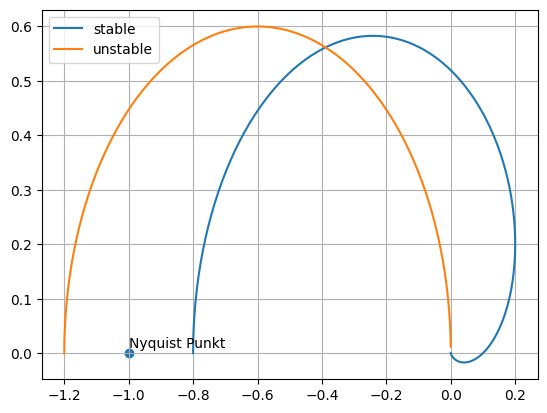

In [ ]:
fix, ax = plt.subplots()

w = np.arange(0.0, 100.0, .01)

stable_vs =  -.8/((1+1j*w)**(3))
unstable_vs = -1.2/(1+1j*w)

ax.plot(np.real(stable_vs), np.imag(stable_vs), label="stable")
ax.plot(np.real(unstable_vs), np.imag(unstable_vs), label='unstable')

ax.grid(which='both')
ax.legend()

ax.scatter([-1], [0])
ax.text(-1, .01, 'Nyquist Punkt')
;

### Offener und geschlossener Regelkreis

Für die Anwendung des Kriteritums braucht man - bei uns - den Offenen Regelkreis, 
    die Übertragungsfunktion ist dabei in der Form:  
$G(s) = \frac{F_O(s)}{1 + F_O(s)}$

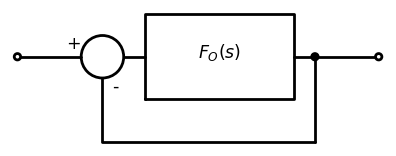

In [ ]:
with schemdraw.Drawing() as d:
    d += elm.Line().idot(open=True).length(1.5)
    d += (c := dsp.Circle().drop('E').label('+', loc='W', ofst=(0, 0.3)).label('-', loc='S', ofst=(.3, 0)))

    d += create_block('$F_O(s)$')
    d.push()
    d += elm.Line().dot(open=True).idot().length(1.5)
    d.pop()
    d += elm.Line().down().length(2)
    d += elm.Wire("-|").to(c.S)

Elemente welche nicht Teil der Rückkopplung sind werden bei der Stabilitätsprüfung **nicht** mitberücksichtigt!!

### Phasenrand

Bei einer Verstärkung von $1$ wie weit ist man von den 180° ($\pi$) noch weg

- $|F_O(i\omega_D)| = 1$
- $\alpha_R = arg(F_O(i\omega_D))$

### Amplitudenrand

Bei einer Phasendrhung von $\pi$, welche Abstand hat man zur Verstärkung von $1$

- $arg(F_O(i\omega_r)) = \pi$ 
- $A_R = \frac{1}{|F_O(i\omega_r)|}$

### Faustregeln (Kommt nicht)

Wenn man $30%$ Überschwingen Einstellen will braucht man einen Phasenrand von ca $40°$